<a href="https://colab.research.google.com/github/VictorSepulveda1994/Minor-Machine-Learning/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

In [74]:
# Importaciones
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [75]:
# Se carga el conjunto de datos
mpg = sns.load_dataset("mpg")
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [76]:
# Información del conjunto de datos
mpg.info()
mpg.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


(398, 9)

In [77]:
# Se reemplazan las filas nulas/basura de la columna 'horsepower' por su media
mean_horsepower = mpg['horsepower'].mean()
print(mean_horsepower)
mpg['horsepower'].fillna(mean_horsepower,inplace=True)

104.46938775510205


In [78]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## 1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

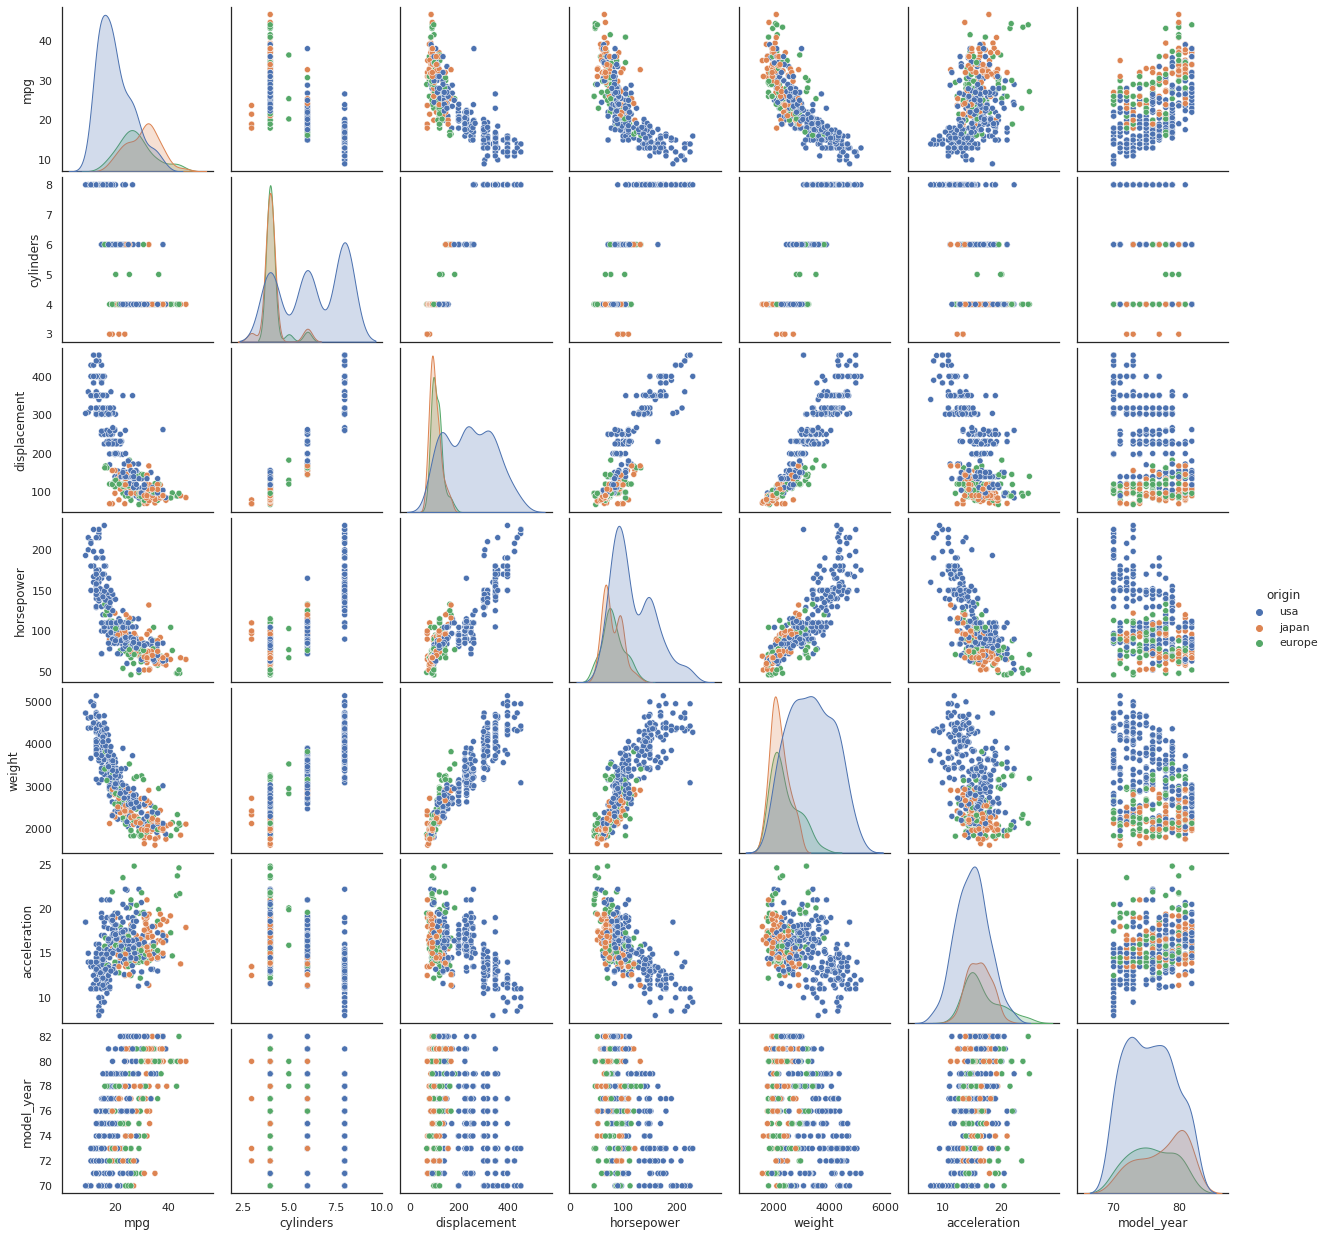

In [79]:
# Se realiza un gráfico de dispersión para cada variable y comprender mejor los datos
sns.set_theme(style="white")
sns.pairplot(mpg, hue="origin", height=2.5)

**Observación:** En los gráficos, se puede apreciar que el rendimiento de los vehículos(***mpg***) tiene una relación lineal mucho más marcada con las variables ***displacement***, ***horsepower*** y ***weight***.

## 2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

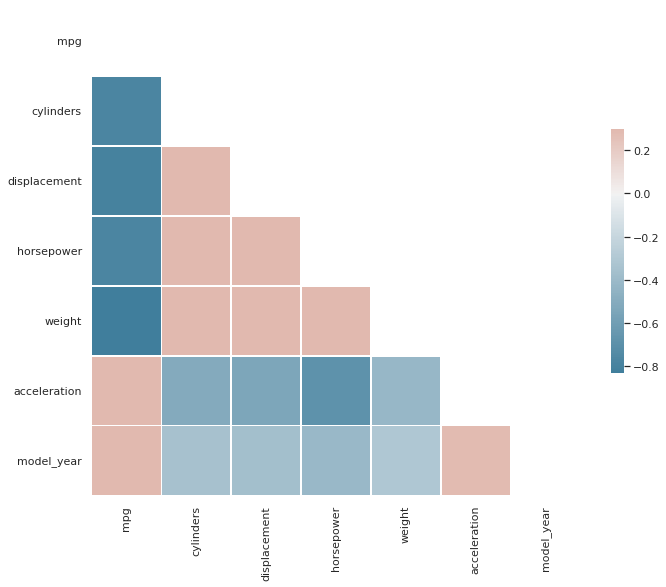

In [80]:
# Se calcula la matriz de correlación
corr = mpg.corr()

# Se genera una máscara para el triángulo superior.
mask = np.triu(np.ones_like(corr, dtype=bool))

# Se Configura la figura matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Se genera un mapa de colores divergente personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Se dibuja el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Observación:** En el gráfico de correlación, se puede apreciar lo mencionado anteriormente, que el rendimiento de los vehículos(***mpg***) tiene una correlación mucho más marcada con las variables ***displacement***, ***horsepower*** y ***weight***. Sin embargo, para este caso se suma una nueva variable la cual es ***cylinders***.

## 3) (1 punto) Construir y entrenar un modelo de regresion lineal


Dado que existen 4 variables con una alta correlación en el rendimiento de un automóvil(***mpg***), se está en presencia de un modelo de Regresión Lineal Múltiple. Dicho modelo, de forma general se define de la siguiente forma:

$ E(Y|X_1,X_2,...,X_p)= β_0 + β_1 ⋅ X_1 + β_2 ⋅ X_2 + ... + β_p ⋅ X_p$ donde $X_1 ... X_p $ son las variables independientes.

Cabe destacar que, dicha fórmula deriva de los supuestos de **Gauss-Markov**.

In [81]:
# Se separan los datos en X (variables predictoras) e y(variable a predecir)
X = mpg[['cylinders','displacement','horsepower','weight']]
y = mpg['mpg']

In [82]:
# Se realiza el split de X e y en los sets de entrenamiento (train) y test
SEMILLA = 1994
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEMILLA)
X_train.shape

(318, 4)

In [83]:
# En statsmodels se le agrega el intercepto (en scikit se lo pasamos como un parametro a la instancia del modelo)
X_constant = sm.add_constant(X_train)
# Se construye el modelo
lin_reg = sm.OLS(y_train, X_constant).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [84]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     199.1
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           1.16e-84
Time:                        02:24:40   Log-Likelihood:                -904.00
No. Observations:                 318   AIC:                             1818.
Df Residuals:                     313   BIC:                             1837.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.0949      1.692     26.651   

In [85]:
# Dado que las variables 'cylinders' y 'displacement' poseen un P mayor que 0,05
# Se eliminarán y se reentrenará el modelo.
X = mpg[['horsepower','weight']]
y = mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEMILLA)
X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_constant).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [86]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     397.7
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           6.54e-87
Time:                        02:24:40   Log-Likelihood:                -904.83
No. Observations:                 318   AIC:                             1816.
Df Residuals:                     315   BIC:                             1827.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7342      0.852     53.658      0.0

## 4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [92]:
# Se creaa una función que las calcule las 4 métricas: R cuadrado, MSE, RMSE, MAE 
def obtener_metricas_performance(y_verdadera, y_predicha, tipo_dataset):
  r2 = r2_score(y_verdadera, y_predicha)
  mse = mean_squared_error(y_verdadera, y_predicha)
  rmse = np.sqrt(mse) 
  mae = mean_absolute_error(y_verdadera, y_predicha)
  return pd.DataFrame({'metrica': ['R2', 'MSE', 'RMSE', 'MAE'],
                        'valor':[r2, mse, rmse, mae],
                        'tipo_dataset':tipo_dataset})
  
# Predecimos los valores de y con nuestro modelo
y_train_mpg = lin_reg.predict(X_constant)
y_train_mpg

323    24.495546
6      10.529100
389    24.011588
20     25.973510
47     21.725845
         ...    
76     23.409403
336    23.870730
203    31.792719
34     20.569054
355    29.273340
Length: 318, dtype: float64

In [93]:
# Obtenemos nuestro dataframe de métricas de performance
performance_train_mpg = obtener_metricas_performance(y_train, y_train_mpg,'entrenamiento')
performance_train_mpg

,metrica,valor,tipo_dataset
0,R2,0.716339,entrenamiento
1,MSE,17.337944,entrenamiento
2,RMSE,4.163886,entrenamiento
3,MAE,3.195823,entrenamiento


In [97]:
# Creamos la matrix de X para el modelo de mpg
X_test_mpg = X_test[['horsepower','weight']]
X_constant_mpg = sm.add_constant(X_test_mpg)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [98]:
# Predecimos los valores
y_test_mpg =  lin_reg.predict(X_constant_mpg)
# Obtenemos nuestro dataframe de métricas de performance
performance_test_mpg =obtener_metricas_performance(y_test, y_test_mpg, 'test')
# Mostramos en conjunto las métricas para entrenamiento y evaluación
pd.concat([performance_train_mpg,performance_test_mpg])

,metrica,valor,tipo_dataset
0,R2,0.716339,entrenamiento
1,MSE,17.337944,entrenamiento
2,RMSE,4.163886,entrenamiento
3,MAE,3.195823,entrenamiento
0,R2,0.650395,test
1,MSE,20.969078,test
2,RMSE,4.579201,test
3,MAE,3.441232,test


## 5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


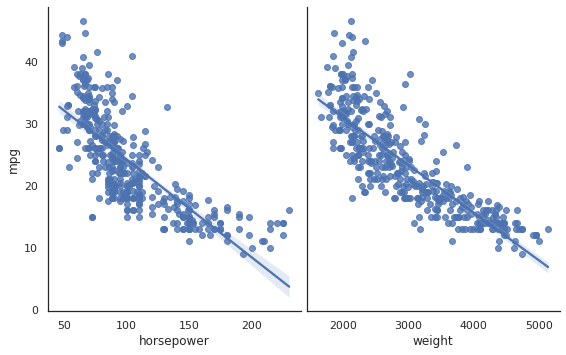

In [99]:
sns.pairplot(mpg, x_vars=["horsepower", "weight"], y_vars=["mpg"],
             height=5, aspect=.8, kind="reg");

Cabe destacar que las otras dos variables del gráfico de correlación tenían un valor $P > 0,05$.

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.